In [2]:
# ## 1. Import Necessary Libraries
# Importing essential libraries for data handling, visualization, and model building.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_curve,
    auc,
)
import matplotlib.pyplot as plt
import seaborn as sns

# Setting style for plots
sns.set_style("whitegrid")

In [3]:
# ## 2. Load and Inspect the Dataset
# Load dataset and explore its structure.

# Filepath to dataset
dataset_path = "dataset_1.csv"

# Load dataset
data = pd.read_csv(dataset_path)

# Display basic information about dataset
print("Dataset Overview:")
print(data.info())
print("\nFirst 5 Rows of the Dataset:")
display(data.head())

print("\nDataset Summary Statistics:")
display(data.describe())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_1   1000 non-null   float64
 1   feature_2   1000 non-null   float64
 2   feature_3   1000 non-null   float64
 3   feature_4   1000 non-null   float64
 4   feature_5   1000 non-null   float64
 5   feature_6   1000 non-null   float64
 6   feature_7   1000 non-null   float64
 7   feature_8   1000 non-null   float64
 8   feature_9   1000 non-null   float64
 9   feature_10  1000 non-null   float64
 10  target      1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB
None

First 5 Rows of the Dataset:


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target
0,1.108936,1.540492,0.493516,-0.529740,0.982175,1.177544,1.623025,1.357325,0.966041,-0.504924,0
1,-0.564641,3.638629,-1.522415,-1.541705,1.616697,4.781310,3.190292,-0.890254,1.438826,-3.828748,0
2,0.516313,2.165426,-0.628486,-0.386923,0.492518,1.442381,1.332905,-1.958175,-0.348803,-1.804124,0
3,1.476534,0.548523,-0.115420,-0.875408,1.301216,0.410295,1.171878,-1.034471,-1.654176,1.344601,0
4,0.278385,1.065828,-1.724917,-2.235667,0.715107,0.731249,-0.674119,0.598330,-0.524283,1.047610,0



Dataset Summary Statistics:


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.055594,-0.004384,-0.072376,-0.935290,0.863523,0.885335,0.531919,0.017115,-0.058077,0.747511,0.104000
std,1.596527,1.528357,1.024196,1.141191,1.146616,1.689768,2.195171,1.029048,1.046402,2.038224,0.305413
min,-4.661168,-4.466020,-3.031194,-4.416512,-3.065364,-4.341477,-7.298063,-3.254479,-3.582063,-8.102614,0.000000
25%,-1.112206,-1.189908,-0.779532,-1.675446,0.246942,-0.204852,-0.887422,-0.676648,-0.744499,-0.249535,0.000000
50%,0.170678,-0.167338,-0.041891,-1.007538,0.878308,0.835578,0.579648,0.025772,-0.081367,1.032990,0.000000
75%,1.180167,1.066860,0.644444,-0.335819,1.533489,2.036998,2.037977,0.679153,0.659029,1.990229,0.000000
max,4.724046,4.837464,3.276399,5.442019,5.943272,7.089706,7.456970,3.089890,2.986329,7.933944,1.000000


In [4]:
# ## 3. Define Features and Target
# Splitting dataset into features (X) and target (y).

# Define target column
target_column = "target"  
X = data.drop(columns=[target_column])  # Features
y = data[target_column]  # Target

# Check for class distribution in target variable
print("\nTarget Class Distribution:")
print(y.value_counts())


Target Class Distribution:
target
0    896
1    104
Name: count, dtype: int64


In [5]:
# ## 4. Split Dataset into Training and Testing Sets
# Dividing dataset into training (80%) and testing (20%) subsets.

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("\nData successfully split into training and testing sets.")
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Data successfully split into training and testing sets.
Training set size: (800, 10)
Testing set size: (200, 10)


In [6]:
# ## 5. Hyperparameter Tuning Using GridSearchCV
# Perform hyperparameter optimization to find best Random Forest parameters.

# Define hyperparameter grid
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["gini", "entropy"],
}

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# GridSearchCV for hyperparameter tuning
print("\nOptimizing Random Forest Model...")
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=3,
    scoring="accuracy",
    verbose=2,
    n_jobs=-1,
)
grid_search.fit(X_train, y_train)

# Display best parameters
best_params = grid_search.best_params_
print("\nBest Hyperparameters Found:")
print(best_params)

# Use best estimator from GridSearchCV
rf_model_optimized = grid_search.best_estimator_


Optimizing Random Forest Model...
Fitting 3 folds for each of 216 candidates, totalling 648 fits

Best Hyperparameters Found:
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


F:\Anaconda\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



Model Accuracy: 0.94

Confusion Matrix:
[[179   0]
 [ 11  10]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       179
           1       1.00      0.48      0.65        21

    accuracy                           0.94       200
   macro avg       0.97      0.74      0.81       200
weighted avg       0.95      0.94      0.94       200



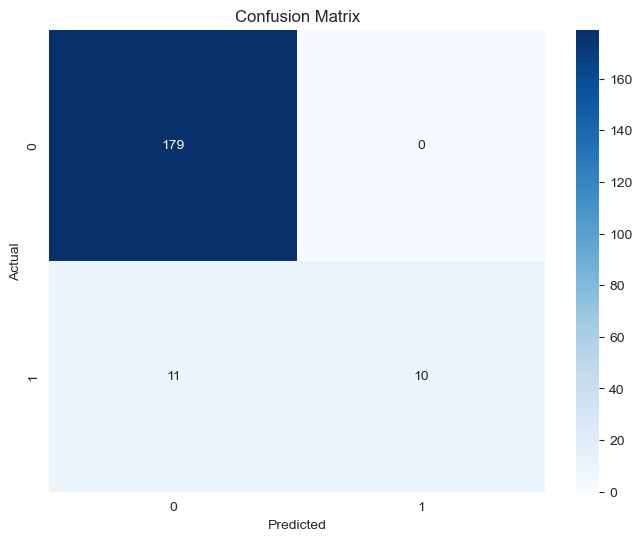

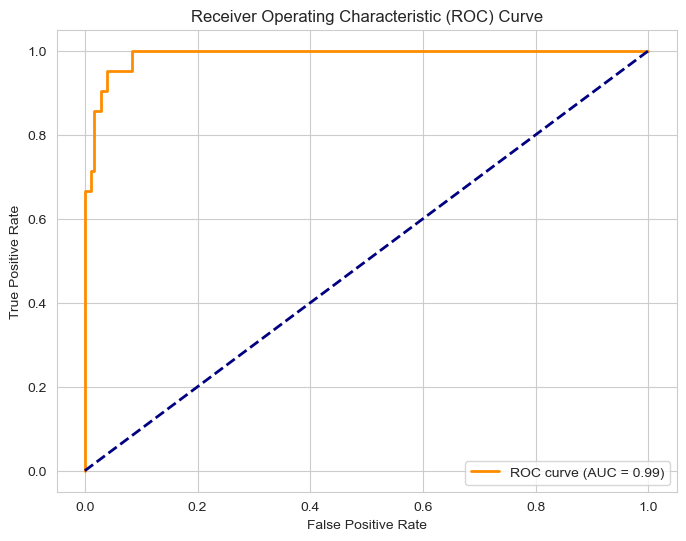

In [7]:
# ## 6. Evaluate Model
# Assess model performance using metrics and visualizations.

# Predictions on test set
y_pred = rf_model_optimized.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display evaluation results
print(f"\nModel Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

# ### Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=rf_model_optimized.classes_,
    yticklabels=rf_model_optimized.classes_,
)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ### ROC Curve for Binary Classification
if len(rf_model_optimized.classes_) == 2:  # Only applicable for binary classification
    y_proba = rf_model_optimized.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()

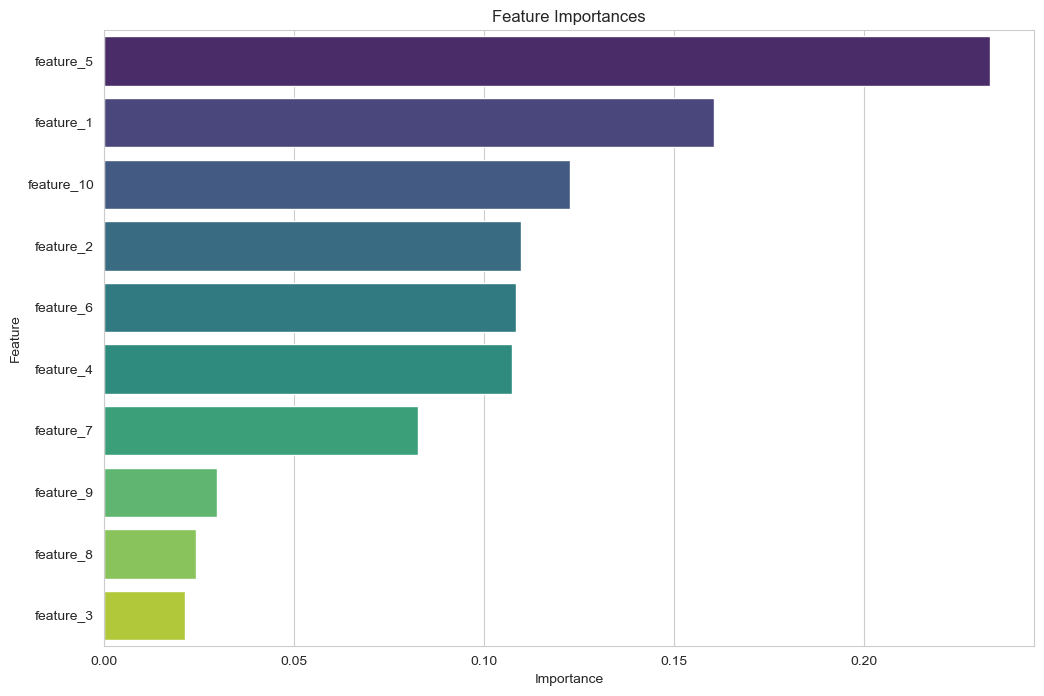

In [8]:
# ## 7. Feature Importance Visualization
# Plot the importance of features to understand model's decision-making.

# Extract feature importances
feature_importances = rf_model_optimized.feature_importances_
feature_names = X.columns

# Sort features by importance
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = [feature_names[i] for i in sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_importances, y=sorted_features, palette="viridis")
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()